In [0]:
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from os import listdir

Using TensorFlow backend.


In [0]:
default_image_size = tuple((256, 256))
directory_root = '/content/drive/My Drive/predict/'
classes=['Pepper__bell___Bacterial_spot' ,'Pepper__bell___healthy',
 'Potato___Early_blight' ,'Potato___Late_blight', 'Potato___healthy',
 'Tomato_Bacterial_spot' ,'Tomato_Early_blight' ,'Tomato_Late_blight',
 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite' ,'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus' ,'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [0]:
#model = pickle.load(open('drive/My Drive/ml project models/cnn_model.pkl', 'rb'))
from keras.models import load_model
model = load_model('drive/My Drive/ml project models/plantdisese_cnn.h5')

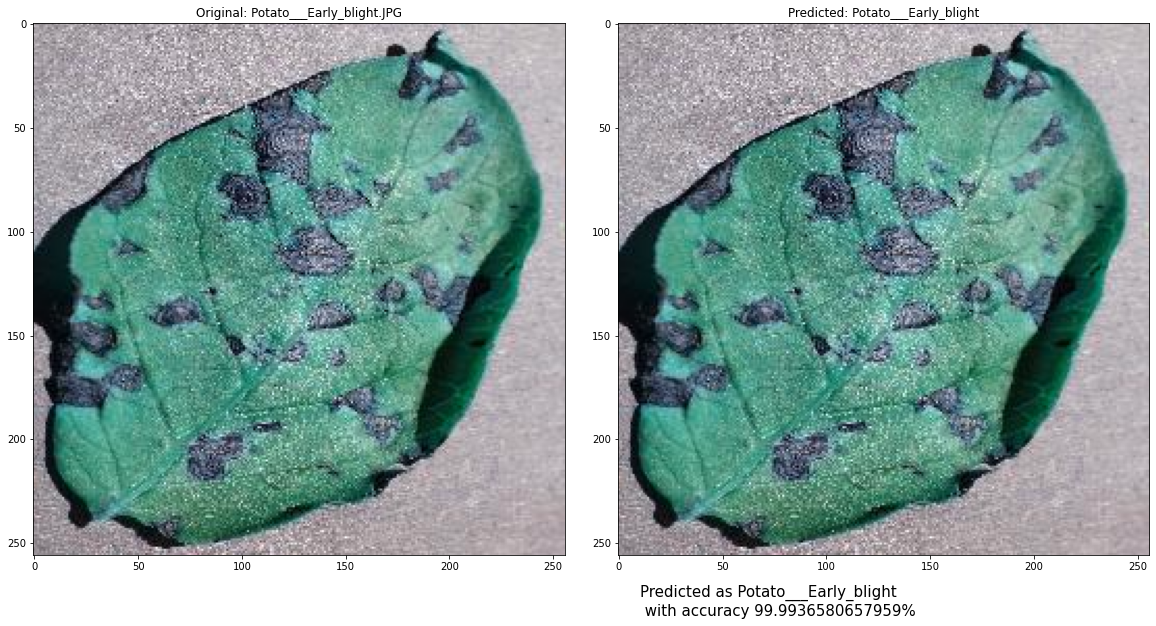

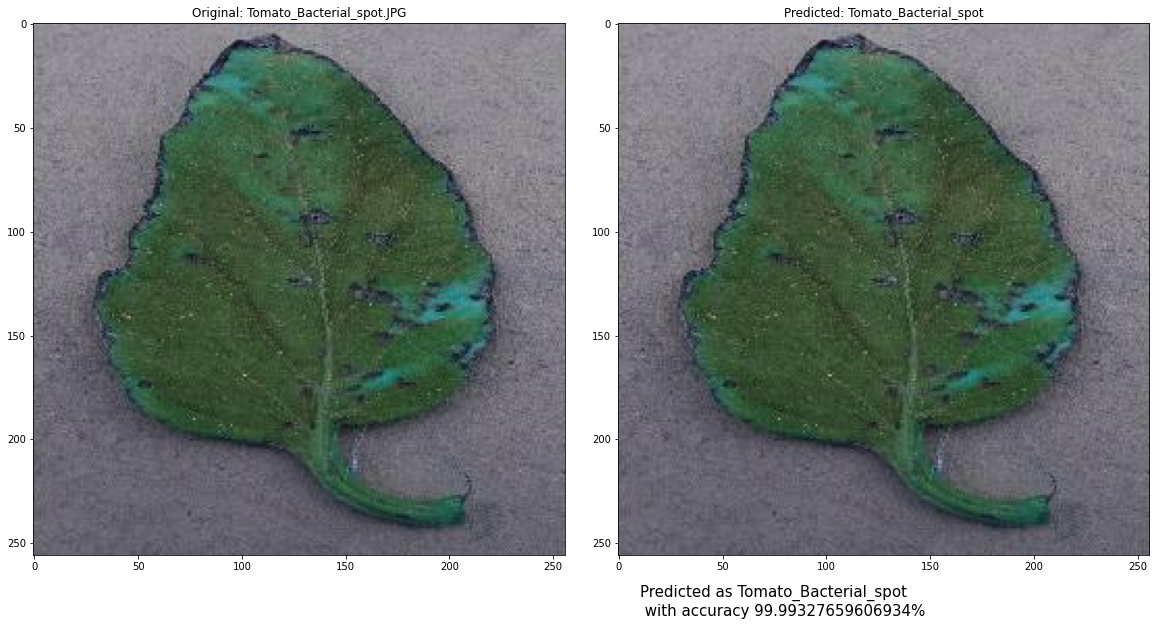

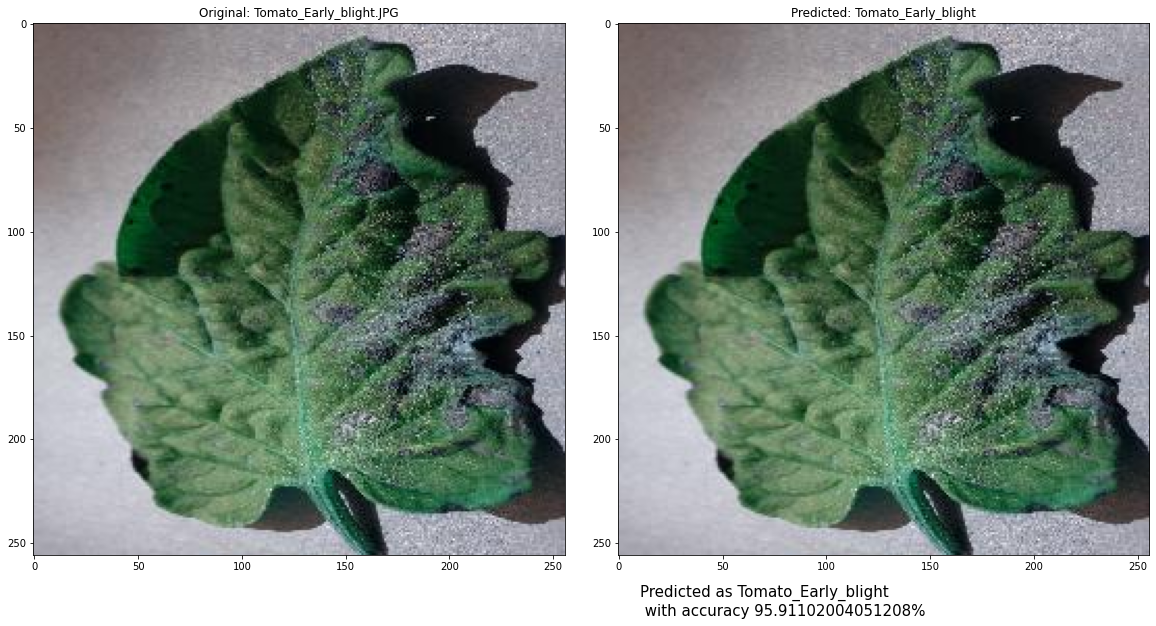

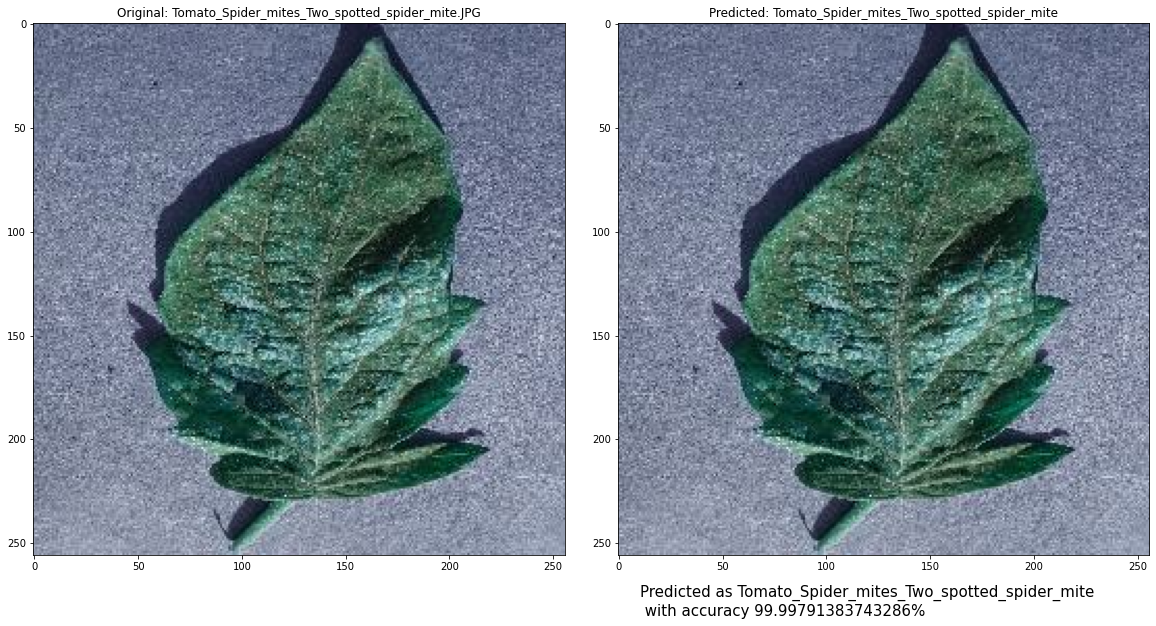

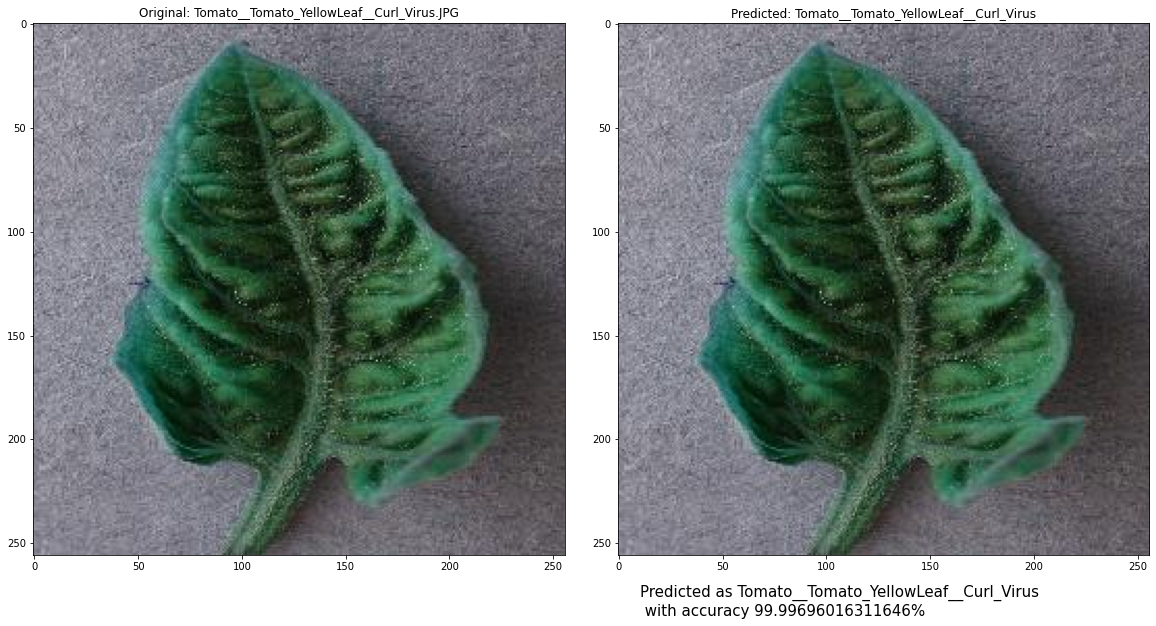

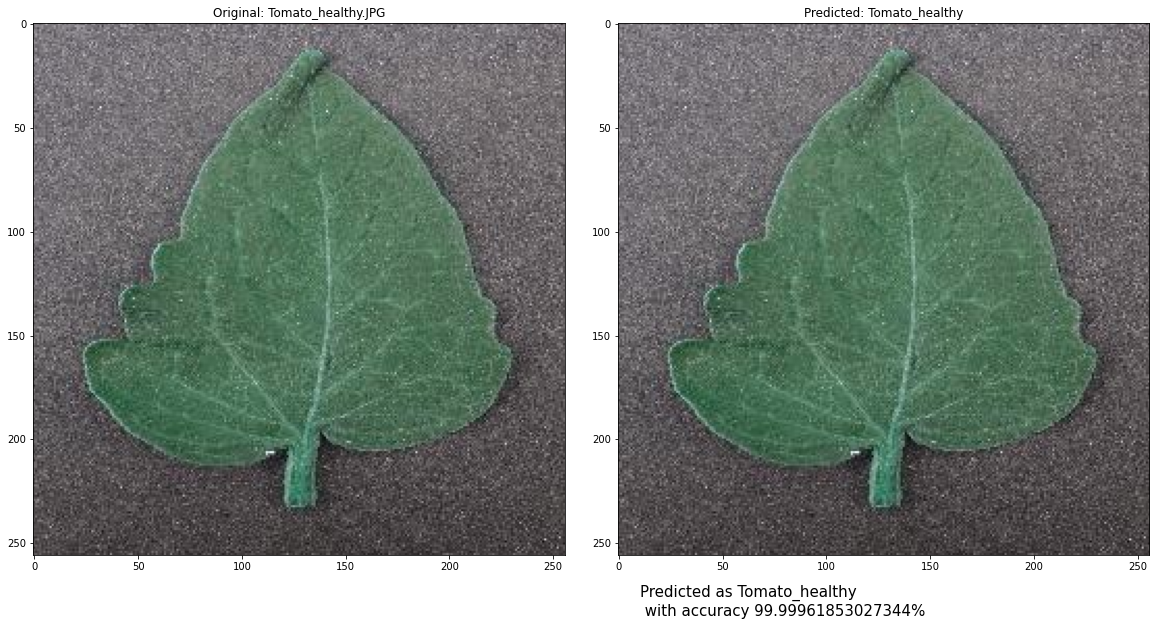

In [0]:
for img in listdir(directory_root):
  if img.endswith('.jpg')==True or img.endswith('.JPG')==True :
    fil=f"{directory_root}{img}"
    image = cv2.imread(fil)
    image = cv2.resize(image, default_image_size)  
    image = img_to_array(image)
    image=np.array([image])/255.0    
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    ax = fig.add_subplot(1,2,1)
    plt.imshow(image[0])
    ax.set_title('Original: '+img)
    a=model.predict(image)
    acc=np.amax(a[0])
    ind=np.where(a[0] == acc)
    res=classes[ind[0][0]]
    ax = fig.add_subplot(1,2,2)
    plt.imshow(image[0])
    ax.set_title('Predicted: '+res)
    plt.text(10,285, 'Predicted as '+res+'\n with accuracy '+str(acc*100)+'%', fontsize=15)    



